#  Graphical Method for solving LPP

## Question: Reddy - Mikks Problem

#### 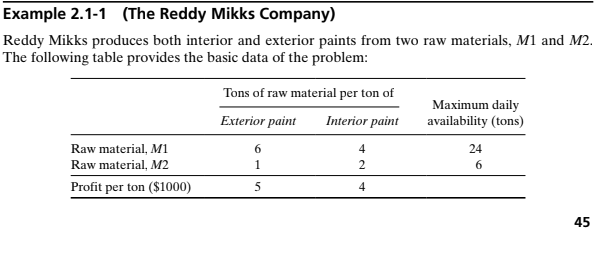

### Problem
$$
\text{Maximize}\ z= 5x_1+4x_2
$$

$$\text{subject to:}\ $$

$$ 6x_1+4x_2\le 24\\
x_1+2x_2\le6\\
-x_1+x2\le1\\
x_2\le2\\
x_1,x_2\ge0\\
$$

##  Importing Dependencies.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
#from scipy.optimize import linprog

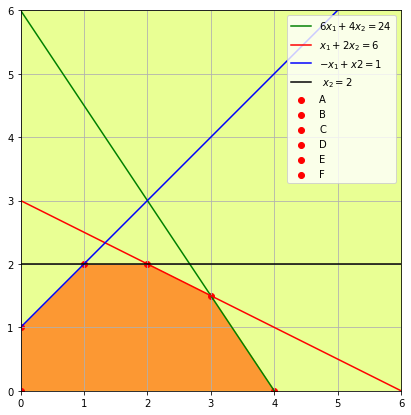

In [6]:
#constraints

l1 = lambda y : (24 - (4*y))/6
l2 = lambda y : 6 - (2*y)
l3 = lambda y : y - 1
l4 = lambda y : 2
plt.figure(figsize=(9, 7))
x = np.linspace(0,10,100)
plt.grid(True)
plt.xlim(0,6)
plt.ylim(0,6)
plt.plot(l1(x),x,color = 'green',label = '$ 6x_1+4x_2 = 24 $')
plt.plot(l2(x),x,color = 'red',label = '$ x_1+2x_2 = 6 $')
plt.plot(l3(x),x,color = 'blue',label = '$ -x_1+x2 = 1 $')
e = []
for a in x:
    e.append(l4(a))
plt.plot(x,e,color = 'black',label = ' $ x_2 = 2 $')
#plotting the corner points
plt.scatter(0,0,color = 'red',label = 'A')
plt.scatter(0,1,color = 'red',label = 'B')
plt.scatter(1,2,color = 'red',label = 'C')
plt.scatter(2,2,color = 'red',label = 'D')
plt.scatter(3,1.5,color = 'red',label = 'E')
plt.scatter(4,0,color = 'red',label = 'F')
#shading the feasible region
d = np.linspace(-1,7,1000)

x,y = np.meshgrid(d,d)
plt.imshow(((6*x+4*y<=24) & (x+2*y<=6) & (-x+y<=1) & (y<=2)) & (x>=0) & (y>=0).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Wistia", alpha = 0.8);

plt.legend(loc = 1)

plt.show()

##  Solving The LPP:

In [5]:
#using cramer's rule (determinants method) To find intersection of two lines.

def intersection(L1, L2):
    D  = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = L1[2] * L2[1] - L1[1] * L2[2]
    Dy = L1[0] * L2[2] - L1[2] * L2[0]
    if D != 0:
        x = Dx / D
        y = Dy / D
        return [x,y]
    else:
        return False
    
# let intersection points be a,b,c,d,e
a = [0,0]
b = [0,1]
#giving respective interscting line coefficients
c = intersection([-1,1,1] , [0,1,2])
d = intersection([1,2,6] , [0,1,2])
e = intersection([1,2,6] , [6,4,24])
f = [4 , 0]
m = []
m.append(a)
m.append(b)
m.append(c)
m.append(d)
m.append(e)
m.append(f)
print(f'Corner points are \n a = {a} \n b = {b} \n c = {c} \n d = {d} \n e = {e} \n f={f} \n ')
z = lambda x,y : 5*x + 4*y
opt = 0
point = []
#finding the maximum(optimum solution ) and at which point....
for i in range(6):
         
        k = z(m[i][0],m[i][1])
        if k > opt:
            opt = k
            point = m[i]
#printing The solution
print(f"The optimum solution is = {opt} , at point = {point}")

Corner points are 
 a = [0, 0] 
 b = [0, 1] 
 c = [1.0, 2.0] 
 d = [2.0, 2.0] 
 e = [3.0, 1.5] 
 f=[4, 0] 
 
The optimum solution is = 21.0 , at point = [3.0, 1.5]
